# ITS Analysis

# Introduction

Interrupted Time Series (ITS) analysis is a powerful quasi-experimental research design used to evaluate the impact of an intervention, policy, or treatment on a given outcome. It is particularly useful in situations where a randomized controlled trial (RCT) is not feasible or ethical. In this notebook, we will perform an ITS analysis on a dataset to evaluate the impact of an intervention on the outcome of interest. We will use Python and its libraries to perform the analysis and visualize the results.

For this study, we will use a dataset containing monthly proportions of urgent caesarean sections at a hospital before and after introduction of a Labour Care Guide. The Labour Care Guide (LCG) is a set of evidence-based practices aimed at improving the quality of care for pregnant women during labour and delivery. This replaced a Partograph, which was the standard. In this analysis we want to see the perfomance of the LCG in reducing the number of urgent caesarean sections.

In [98]:
# Let's start by loading the data from the uploaded CSV file to understand its structure before proceeding to draw the trend graph.
import pandas as pd

# Load the data
data = pd.read_csv("D:\ACADEMIA\Research\Dr  Peter LCG\Analysis\data2024.csv")

# Display the first few rows of the dataframe to understand its structure
data.head()


,record_id,study_id,hospital_number,date_of_admission,age,marital_status,residence,religion,highest_education_level,parity,...,Mariage_status,parity_cat,abortions_cat,gestage_cat,prolonged_labor,Dura_lab,y_m,total_count,success_count,proportion
0,896,905,387078.0,04mar2021,28,Married,Semi-urban,Muslim,Tertiary,6,...,ever married,5+,2+,37+,Yes,<18,2021_07,92,21,0.228261
1,751,759,431500.0,24mar2021,33,Married,Urban,Christian,Tertiary,2,...,ever married,2-4,None,37+,Yes,<18,2021_07,92,21,0.228261
2,474,440,420326.0,12jul2021,26,Married,Semi-urban,Christian,Secondary,1,...,ever married,One,None,37+,No,<18,2021_07,92,21,0.228261
3,14,13,425360.0,17jul2021,29,Married,Urban,Other,Tertiary,1,...,ever married,One,None,<37,Yes,<18,2021_07,92,21,0.228261
4,3,2,413931.0,12jul2021,25,Married,Semi-urban,Muslim,Secondary,1,...,ever married,One,one,37+,No,<18,2021_07,92,21,0.228261


In [27]:
#column names
data.columns

Index(['record_id', 'study_id', 'hospital_number', 'date_of_admission', 'age',
       'marital_status', 'residence', 'religion', 'highest_education_level',
       'parity', 'number_of_abortions', 'previous_caesarean_section',
       'patient_was_a_referral', 'booking_status',
       'number_of_antenatal_visits', 'hiv_status', 'medical_illness___0',
       'medical_illness___1', 'medical_illness___2', 'medical_illness___3',
       'medical_illness___4', 'medical_illness___5', 'medical_illness___6',
       'medical_illness___7', 'medical_illness___8', 'medical_illness___9',
       'medical_illness___10', 'gestation_age_at_delivery', 'labour_onset',
       'mode_of_delivery', 'labour_monitoring', 'duration_of_labour_hours',
       'artificial_rupture_of_memb', 'augmentation_with_oxytocin',
       'had_an_urgent_caesarean_se', 'indication_of_urgent_cs___1',
       'indication_of_urgent_cs___2', 'indication_of_urgent_cs___3',
       'indication_of_urgent_cs___4', 'indication_of_urgent_cs___

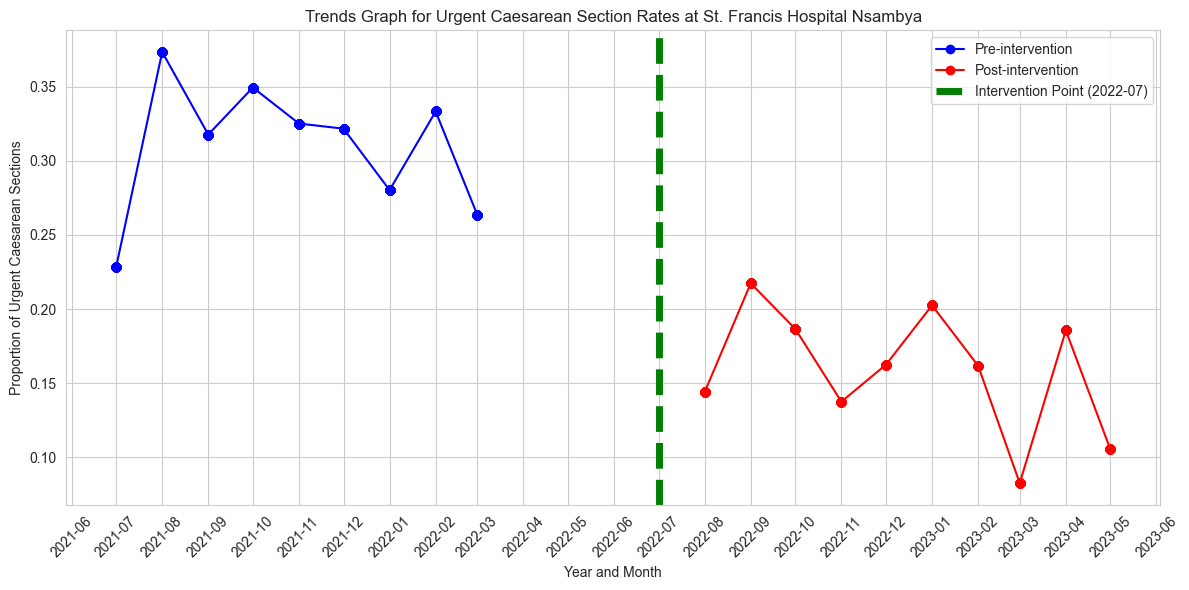

In [99]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Strip leading and trailing spaces from 'y_m' column and retry conversion
data['y_m'] = data['y_m'].str.strip()

# Convert 'y_m' to datetime format for easier handling and plotting
data['y_m'] = pd.to_datetime(data['y_m'], format='%Y_%m')

# Define pre-intervention and post-intervention periods
pre_intervention_period = (data['y_m'] >= '2021-07') & (data['y_m'] <= '2022-06')
post_intervention_period = (data['y_m'] >= '2022-08') & (data['y_m'] <= '2023-06')

# Filter data for pre-intervention and post-intervention periods
pre_intervention_data = data[pre_intervention_period]
post_intervention_data = data[post_intervention_period]

# Combine the filtered data
filtered_data = pd.concat([pre_intervention_data, post_intervention_data])

# Sort by date to ensure correct plotting order
filtered_data.sort_values('y_m', inplace=True)

# Define the intervention point correctly this time
intervention_point = '2022-07'

# plotting with the intervention point correctly defined
fig, ax = plt.subplots(figsize=(12, 6))

# Plot pre-intervention data
ax.plot(pre_intervention_data['y_m'], pre_intervention_data['proportion'], label='Pre-intervention', marker='o', linestyle='-', color='blue')

# Plot post-intervention data
ax.plot(post_intervention_data['y_m'], post_intervention_data['proportion'], label='Post-intervention', marker='o', linestyle='-', color='red')

# Highlight the intervention point
plt.axvline(x=pd.to_datetime(intervention_point), color='green', linestyle='--', label='Intervention Point (2022-07)', linewidth=5)

# Formatting the plot 
plt.title('Trends Graph for Urgent Caesarean Section Rates at St. Francis Hospital Nsambya')
plt.xlabel('Year and Month')
plt.ylabel('Proportion of Urgent Caesarean Sections')
plt.legend()

# Improve date formatting on x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.grid(visible=True)

# Show plot
plt.tight_layout()
plt.show()



# ITS Analysis: Intervention Introduction (Labour Care Guide)

In [104]:
import warnings
warnings.filterwarnings('ignore')

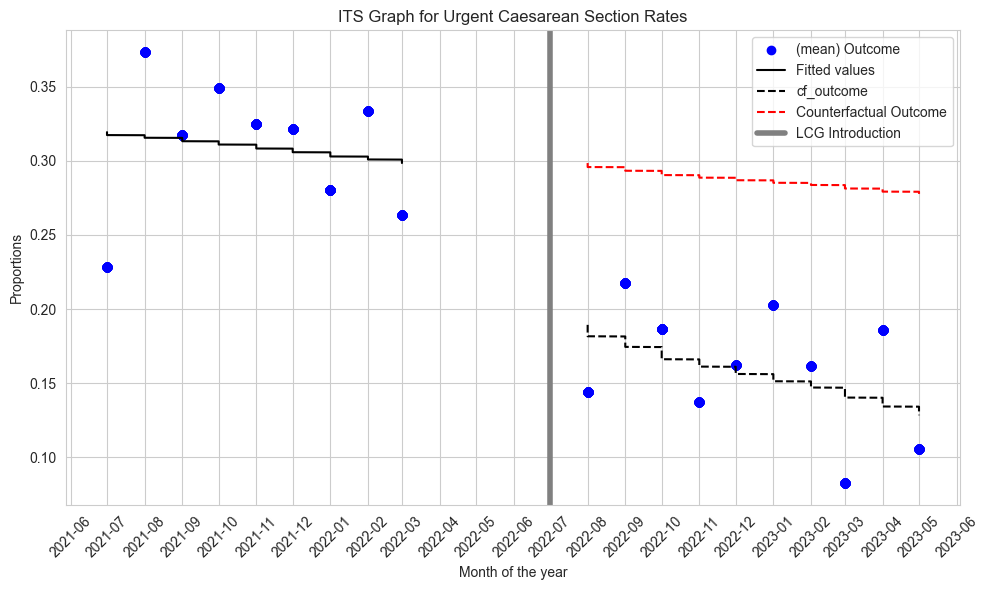

In [105]:
# Importing the required libraries
from statsmodels.formula.api import ols
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
data = pd.read_csv("D:\ACADEMIA\Research\Dr  Peter LCG\Analysis\data2024.csv")
data['y_m'] = data['y_m'].str.strip()  # Clean the 'y_m' column
data['date'] = pd.to_datetime(data['y_m'], format='%Y_%m')  # Convert 'y_m' to datetime
data = data.sort_values(by='date')  # Sort values by date

# Define pre and post intervention data
pre_intervention_data = data[(data['date'] >= '2021-07-01') & (data['date'] <= '2022-06-30')]
post_intervention_data = data[(data['date'] >= '2022-08-01') & (data['date'] <= '2023-06-30')]

# Adding a numeric index for regression
pre_intervention_data['index'] = np.arange(len(pre_intervention_data))
post_intervention_data['index'] = np.arange(len(post_intervention_data))

# Fit linear models
pre_model = ols('proportion ~ index', data=pre_intervention_data).fit()
post_model = ols('proportion ~ index', data=post_intervention_data).fit()

# Get the fitted values from the models
pre_intervention_data['fitted'] = pre_model.fittedvalues
post_intervention_data['fitted'] = post_model.fittedvalues

# Counterfactual calculation: assuming pre-intervention trend continued post-intervention
counterfactual_index = post_intervention_data['index'] + len(pre_intervention_data)
counterfactual = pre_model.params['Intercept'] + pre_model.params['index'] * counterfactual_index

# Create a combined dataset for plotting
combined_data = pd.concat([pre_intervention_data, post_intervention_data])

# Re-plotting the ITS graph with adjustments
fig, ax = plt.subplots(figsize=(10, 6))

# Plot actual data points
ax.scatter(combined_data['date'], combined_data['proportion'], label='(mean) Outcome', color='blue')

# Plot fitted values for pre-intervention
ax.plot(pre_intervention_data['date'], pre_intervention_data['fitted'], label='Fitted values', color='black')

# Plot fitted values for post-intervention
ax.plot(post_intervention_data['date'], post_intervention_data['fitted'], label='cf_outcome', color='black', linestyle='--')

# Plot the counterfactual outcome line
ax.plot(post_intervention_data['date'], counterfactual, label='Counterfactual Outcome', color='red', linestyle='--')

# Highlight the intervention point with a thicker line
intervention_point = '2022-07-01'  # Define the intervention point as July 2022
plt.axvline(x=pd.to_datetime(intervention_point), color='grey', linestyle='-', linewidth=4, label='LCG Introduction')

# Formatting the plot
plt.title('ITS Graph for Urgent Caesarean Section Rates')
plt.xlabel('Month of the year')
plt.ylabel('Proportions')
plt.legend()

# Improve date formatting on x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.grid(visible=True)

# Show plot
plt.tight_layout()
plt.show()


In [106]:
#model output
pre_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             proportion   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     21.70
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           3.64e-06
Time:                        02:30:03   Log-Likelihood:                 1725.6
No. Observations:                 958   AIC:                            -3447.
Df Residuals:                     956   BIC:                            -3438.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3194      0.003    123.707      0.000       0.314       0.324
index      -2.176e-05   4.67e-06     -4.658      0.000   -3.09e-05   -1.26e-05
==============================================================================
Omnibus:                       84.956   Durbin-Watson:                   0.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.121
Skew:                          -0.818   Prob(JB):                     5.48e-24
Kurtosis:                       3.070   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
#model output
post_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             proportion   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     216.0
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           2.49e-44
Time:                        02:30:05   Log-Likelihood:                 1829.6
No. Observations:                 982   AIC:                            -3655.
Df Residuals:                     980   BIC:                            -3645.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1894      0.002     78.993      0.000       0.185       0.194
index      -6.218e-05   4.23e-06    -14.696      0.000   -7.05e-05   -5.39e-05
==============================================================================
Omnibus:                     3706.062   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.198
Skew:                          -0.174   Prob(JB):                     1.72e-17
Kurtosis:                       1.671   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# ITS Analysis: Intervention Introduction (LCG) with No Oxytocin Augmentation

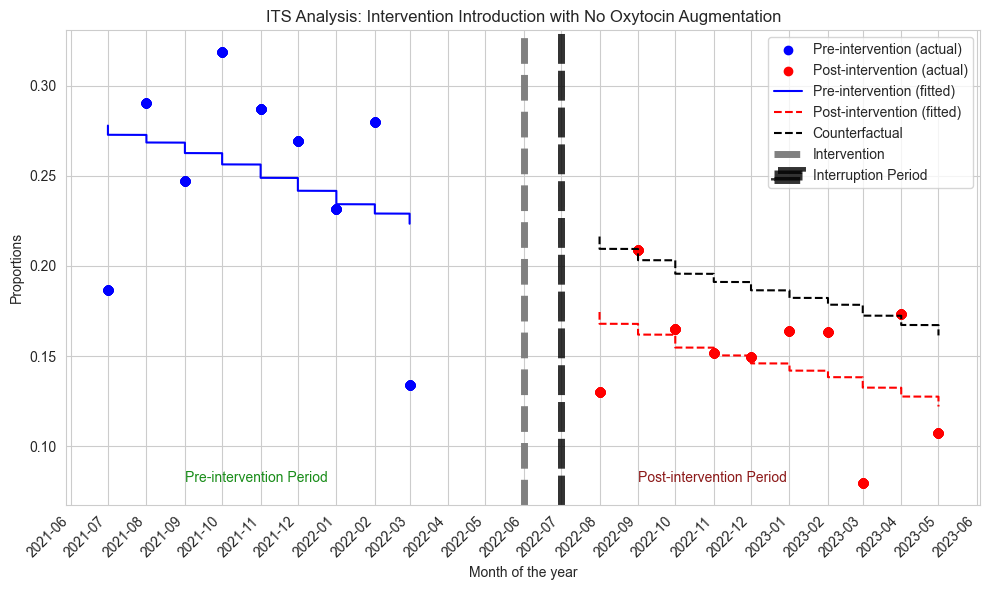

In [108]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# Load the dataset
data = pd.read_csv("D:\ACADEMIA\Research\Dr  Peter LCG\Analysis\oxytocin_no.csv")
data['y_m'] = data['y_m'].str.strip()  # Clean the 'y_m' column
data['date'] = pd.to_datetime(data['y_m'], format='%Y_%m')  # Convert 'y_m' to datetime
data = data.sort_values(by='date')  # Sort values by date

# Define the pre-intervention and post-intervention periods
pre_intervention_period = pd.date_range(start="2021-07-01", end="2022-06-01", freq='MS')
post_intervention_period = pd.date_range(start="2022-08-01", end="2023-06-01", freq='MS')
interruption_period = pd.date_range(start="2022-07-01", end="2022-07-01", freq='MS')

# Mark the pre and post periods in the data
data['Intervention'] = 0  # Default to 0 (pre-intervention)
data.loc[data['date'].isin(post_intervention_period), 'Intervention'] = 1  # Post-intervention
data.loc[data['date'].isin(interruption_period), 'Intervention'] = np.nan  # Interruption period

# Create a time variable as a numeric sequence starting from 1
data['time'] = np.arange(1, len(data) + 1)

# Split data into pre- and post-intervention, excluding the interruption period
pre_intervention_data = data[data['Intervention'] == 0]
post_intervention_data = data[(data['Intervention'] == 1) & (~data['date'].isin(interruption_period))]

# Fit the models
formula_proportion = 'proportion ~  time'
pre_model = smf.ols(formula_proportion, data=pre_intervention_data).fit()
post_model = smf.ols(formula_proportion, data=post_intervention_data).fit()

# Generate predictions
pre_intervention_data['fitted_values'] = pre_model.predict(pre_intervention_data[['time']])
post_intervention_data['fitted_values'] = post_model.predict(post_intervention_data[['time']])

## Continue from the previous code snippet

# Generate counterfactual predictions for the post-intervention period
post_intervention_data['counterfactual'] = pre_model.predict(post_intervention_data[['time']])

# Plot the ITS graph with counterfactual
plt.figure(figsize=(10, 6))

# Plot the actual proportions for pre- and post-intervention
plt.scatter(pre_intervention_data['date'], pre_intervention_data['proportion'], label='Pre-intervention (actual)', color='blue')
plt.scatter(post_intervention_data['date'], post_intervention_data['proportion'], label='Post-intervention (actual)', color='red')

# Plot the fitted values for pre-intervention
plt.plot(pre_intervention_data['date'], pre_intervention_data['fitted_values'], color='blue', label='Pre-intervention (fitted)')

# Plot the fitted values for post-intervention
plt.plot(post_intervention_data['date'], post_intervention_data['fitted_values'], color='red', linestyle='--', label='Post-intervention (fitted)')

# Plot the counterfactual predictions for post-intervention
plt.plot(post_intervention_data['date'], post_intervention_data['counterfactual'], color='black', linestyle='--', label='Counterfactual')

# Mark the intervention and interruption periods
plt.axvline(x=pre_intervention_period[-1], color='grey', linestyle='--', label='Intervention', linewidth=5)
plt.axvspan(interruption_period[0], interruption_period[-1], color='black', alpha=0.8, label='Interruption Period', linestyle='--', linewidth=5)

# Labels and title
plt.title('ITS Analysis: Intervention Introduction with No Oxytocin Augmentation')
plt.xlabel('Month of the year')
plt.ylabel('Proportions')
plt.legend()

# Label the pre and post-intervention periods on the graph
plt.text(x=pd.to_datetime('2021-09'), y=0.08, s='Pre-intervention Period', alpha=0.9, color='green')
plt.text(x=pd.to_datetime('2022-09'), y=0.08, s='Post-intervention Period', alpha=0.9, color='maroon')

# Improve layout and x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()  # Rotatio
plt.xticks(rotation=45)
plt.grid(visible=True)

# Show the plot
plt.tight_layout()
plt.show()



In [109]:
#model output
pre_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             proportion   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     76.00
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           1.66e-17
Time:                        02:30:10   Log-Likelihood:                 1235.3
No. Observations:                 790   AIC:                            -2467.
Df Residuals:                     788   BIC:                            -2457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2779      0.004     76.925      0.000       0.271       0.285
time       -6.899e-05   7.91e-06     -8.718      0.000   -8.45e-05   -5.35e-05
==============================================================================
Omnibus:                       97.919   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.308
Skew:                          -0.808   Prob(JB):                     2.73e-22
Kurtosis:                       2.362   Cond. No.                         914.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
#model output
post_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             proportion   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     171.0
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           1.56e-35
Time:                        02:30:11   Log-Likelihood:                 1594.4
No. Observations:                 796   AIC:                            -3185.
Df Residuals:                     794   BIC:                            -3175.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2333      0.007     35.303      0.000       0.220       0.246
time       -6.594e-05   5.04e-06    -13.077      0.000   -7.58e-05    -5.6e-05
==============================================================================
Omnibus:                      191.364   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.608
Skew:                          -0.280   Prob(JB):                     2.06e-10
Kurtosis:                       1.984   Cond. No.                     7.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""